In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### Loading data

In [13]:
df = pd.read_csv('https://media.githubusercontent.com/media/stngan/sentiment-python/main/IMDB-Dataset.csv')

In [14]:
df.head(10)

,Ratings,Reviews,Movies
0,1,*Disclaimer: I only watched this movie as a co...,Disaster Movie
1,1,I am writing this in hopes that this gets put ...,Disaster Movie
2,1,"Really, I could write a scathing review of thi...",Disaster Movie
3,1,If you saw the other previous spoof movies by ...,Disaster Movie
4,1,This movie I saw a day early for free and I st...,Disaster Movie
5,1,"Honestly, what is wrong with you, Hollywood? N...",Disaster Movie
6,1,I was given a free ticket to this film; so I c...,Disaster Movie
7,1,"OK, so ""Disastrous"" isn't an imaginative barb ...",Disaster Movie
8,1,"Jason Friedberg and Aaron Seltzer, the way eve...",Disaster Movie
9,1,Honestly the worst movie ever made. Theatre fu...,Justin Bieber: Never Say Never


In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
other_stopwords = ["would","shall","could","might"]
stop_words.extend(other_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'mightn', 'own', 'were', 'some', 'who', 'an', 'he', 'that', "should've", 'his', 've', 'does', 'above', "mustn't", 'me', 'itself', 'this', 'was', 'while', 'don', 'is', 'will', 'few', 'themselves', 'have', 'other', "you've", 'its', 'until', 'ourselves', 'my', 'doesn', 'mustn', 'shall', 'just', 'ma', 'by', 'if', 'no', 'hers', 'through', 'nor', 'or', 'him', 'whom', 'once', 'and', 'she', 'has', 'himself', 'why', 'her', 'you', 'the', "couldn't", 'herself', "you're", 'yourselves', 'most', 'should', 'i', 'these', 'in', 'there', "wasn't", 'we', "don't", "shan't", 'weren', 'what', 'from', 'where', 'it', 'all', 'be', 'did', 'with', 'against', 'hasn', "didn't", 'at', 'couldn', "mightn't", 'when', 'theirs', 'those', 't', "hadn't", 'both', 'been', 'between', 'into', 'so', 'shan', 'shouldn', 'wasn', 'haven', 'being', 'yours', 'about', 'am', 'then', 'myself', 'over', 'further', 'for', 'more', "that'll", "you'll", 'off', 'on', "weren't", 'them', 'only', 'wouldn', "wouldn't", 'hadn', 'needn', "won't", 

In [31]:
def remove_special_character(review):
    return re.sub(r'[^\w\s]', '', review)

In [32]:
def remove_url(review):
    return re.sub(r'http\S+', '', review)

In [33]:
def remove_stopwords(review):
    clean_data = []
    for word in review.split():
        word_cleaned = word.strip().lower()
        if word_cleaned not in stop_words and word_cleaned.isalpha():
            clean_data.append(word_cleaned)
    return " ".join(clean_data)

In [34]:
def contraction_expansion(review):
    contraction_dict = {
        "won't": "would not",
        "can't": "can not",
        "don't": "do not",
        "shouldn't": "should not",
        "needn't": "need not",
        "hasn't": "has not",
        "haven't": "have not",
        "weren't": "were not",
        "mightn't": "might not",
        "didn't": "did not",
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'ve": " have",
        "'m": " am"
    }
    for contraction, expansion in contraction_dict.items():
        review = re.sub(r"\b" + re.escape(contraction) + r"\b", expansion, review)
    return review


In [35]:
def data_cleaning(review):
    review = contraction_expansion(review)
    review = remove_special_character(review)
    review = remove_url(review)
    review = remove_stopwords(review)    
    return review

In [36]:
pd.options.display.max_colwidth = 1000
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

,Ratings,Reviews,Movies,Reviews_clean
0,1,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,disclaimer watched movie conditional agreement see films free wouldnt caught dead giving hard earned money idiotswell explain depth film write shortest review ever dont see movie far stupidest lamest lazy unbelievably unfunny movie ever seen total disaster since hatred movie others like extends far beyond one viewing think go biti not know people movie besides carmen electra vanessa minnillo kim kardashian doesnt matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come filmmaking someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster movie pass herethe jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nomineesyou know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers dire...
1,1,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...",Disaster Movie,writing hopes gets put previous review film anyone find slop entertaining completely beyond first spoof film entitled disaster movie indeed spoof disaster films seen yes count disaster film spoofed twister juno iron man batman hulk alvin chipmunks amy winehouse hancock register disaster films selzterwater failburg shown lack sort writing skill humor unfortunately tortured date movie epic movie know exactly expect twono plot jokes bad references cheaply remade scenes films someone informed satire copy paste one film another though not say actually seem taken trailersthere nothing clever witty remotely smart way two write not believe people still pay see travesties insult audience though enjoy films doubt smart enough realize thatrating unfortunately not number low enough yes includes negatives rate deserves top worst films time right date movie epic faliurei mean movie meet spartans rather forced hour 

In [37]:
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Reviews_clean     0
dtype: int64

In [39]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [41]:
df['Reviews_clean'].describe()

count     150000
unique    149756
top        story
freq          10
Name: Reviews_clean, dtype: object

In [43]:
unique_reviews_count = df['Reviews_clean'].nunique()
unique_movie_names_count = df['Movies'].nunique()
ratings_count = df['Ratings'].count()
print(f'Unique reviews: {unique_reviews_count}')
print(f'Unique movie names: {unique_movie_names_count}')
print(f'Number of ratings: {ratings_count}')

Unique reviews: 149756
Unique movie names: 14205
Number of ratings: 150000


1     15000
2     15000
4     15000
3     15000
5     15000
6     15000
8     15000
7     15000
10    15000
9     15000
Name: Ratings, dtype: int64


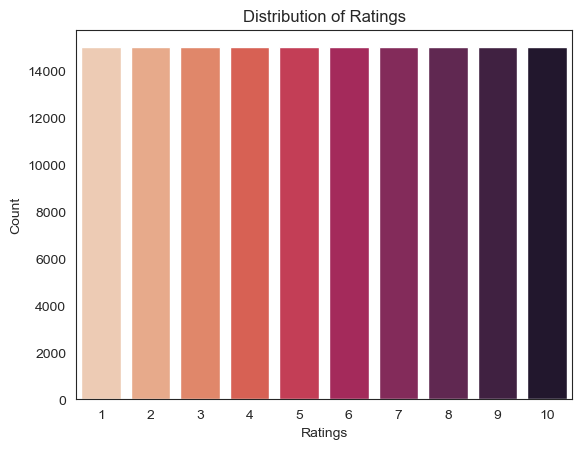

In [60]:
sns.countplot(x=df['Ratings'], palette='rocket_r')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
print(df['Ratings'].value_counts())
plt.show()

In [63]:
pos = ' '.join(map(str, df['Reviews_clean'][df['Ratings'] >= 7]))
neg = ' '.join(map(str, df['Reviews_clean'][df['Ratings'] <= 4]))
stop_words = set(STOPWORDS)

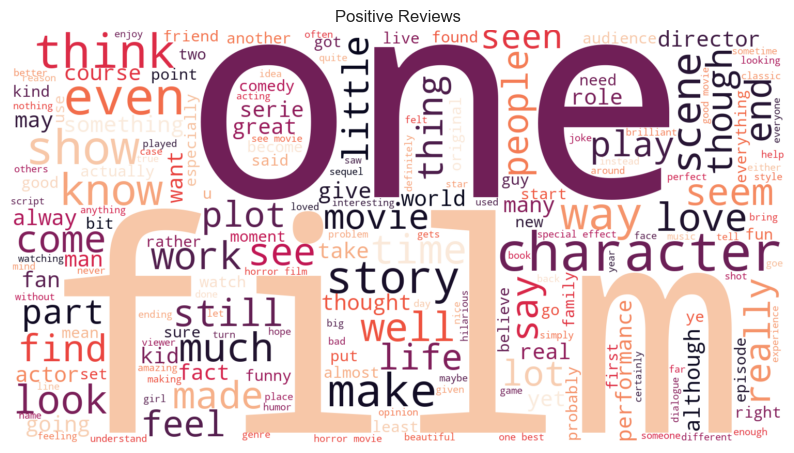

In [64]:
pos_wordcloud = WordCloud(width=1500, height=800, 
                          background_color='white', 
                          stopwords=stop_words, 
                          colormap='rocket_r',
                          min_font_size=15).generate(pos)

plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')
plt.show()

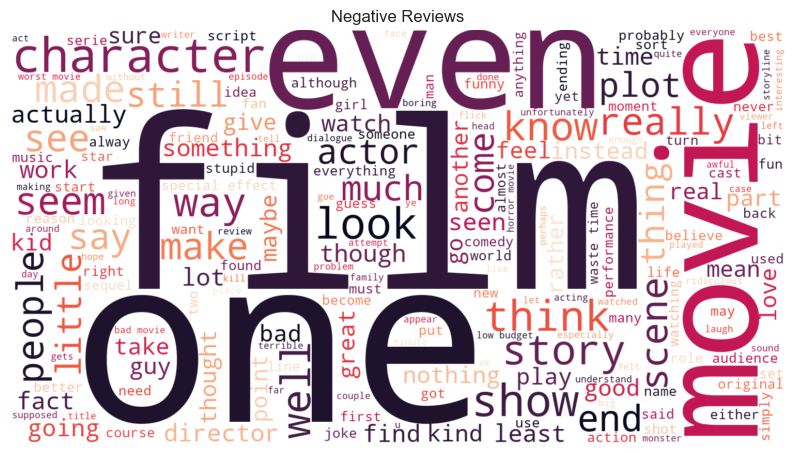

In [65]:
neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                colormap='rocket_r',
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 